In [ ]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)

# Visualization

In [ ]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

In [ ]:
%%R

require('ggplot2')
require('readr')
require('extrafont')
require('dplyr')
require('reshape2')
require('tidyverse')

Rows: 5 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Category
dbl (1): project_numbers

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


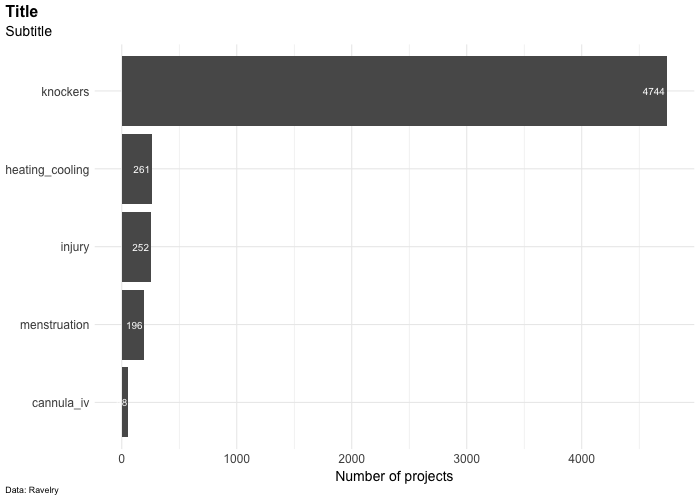

In [155]:
%%R -h 500 -w 700

df <- read_csv('data/categories.csv')

ggplot(df, aes(y = reorder(Category, project_numbers), x = project_numbers)) + 
    geom_bar(stat = 'identity') +
    geom_text(aes(label=project_numbers), hjust=1.1, color="white", size=3.5) +
    theme_minimal() +
    labs(x = "Number of projects", y = NULL ,
       title = "Title",
       subtitle = "Subtitle",
       caption = "Data: Ravelry")  +
    theme(axis.title.x = element_text(vjust = 0, size = 14),
        axis.text = element_text(size = 12),
        axis.text.x = element_text(size = 12),
        plot.title = element_text(size = 16, face = "bold"),
        plot.subtitle = element_text(size = 14),
        plot.caption = element_text(hjust = 0),
        plot.title.position = "plot",
        plot.caption.position = "plot")

In [ ]:
%%R
# library
library(treemap)
 
# Create data
group <- c("knockers","other")
value <- c(4744,991)
data <- data.frame(group,value)
 
# treemap
treemap(data,
            index="group",
            vSize="value",
            type="index"
            )

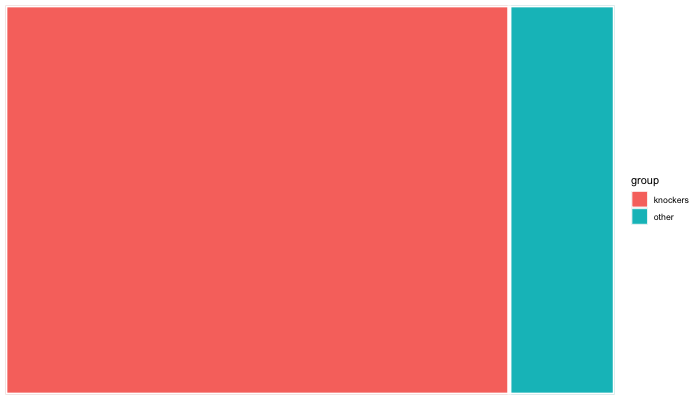

In [156]:
%%R -h 400 -w 700
library(treemapify)

group <- c("knockers","other")
value <- c(4744,991)
data <- data.frame(group,value)

ggplot(data, aes(area = value, fill = group, label = group, subgroup = value)) +
  geom_treemap() +
  geom_treemap_subgroup_border(colour = "white", size = 5) 

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


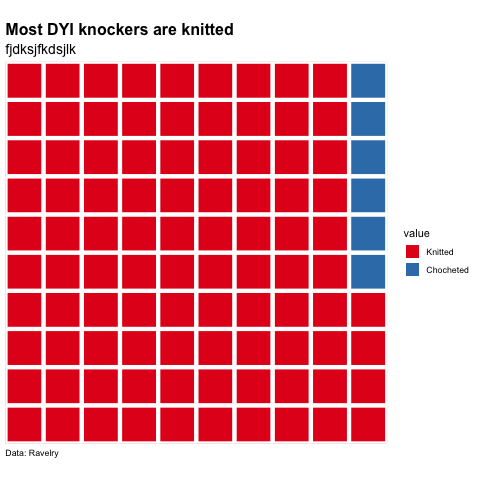

In [158]:
%%R
library(waffle)
library(htmltools)

df <- c(`Knitted`=94, `Chocheted`=6)

waffle(df, rows=10) +
    scale_fill_brewer(palette="Set1") +
    labs(
       title = "Most DYI knockers are knitted",
       subtitle = "fjdksjfkdsjlk",
       caption = "Data: Ravelry")  +
    theme(
        plot.title = element_text(size = 16, face = "bold"),
        plot.subtitle = element_text(size = 14),
        plot.caption = element_text(hjust = 0),
        plot.title.position = "plot",
        plot.caption.position = "plot")
    

In [159]:
%%R -h 500 -w 700

df <- read_csv('data/cancer_stats.csv')

ggplot(df, aes(y = reorder(`Cancer Type`, `Age-Adjusted Rate`), x = `Age-Adjusted Rate`)) + 
    geom_bar(stat = 'identity') +
    geom_text(aes(label=`Age-Adjusted Rate`), hjust=1.3, color="white", size=3.5) +
    theme_minimal() +
    labs(x = "Frequency", y = NULL ,
       title = "Breast Cancer is the most common type of cancer among American Women",
       subtitle = "fjdksjfkdsjlk",
       caption = "Data: CDC Cancer Statistics")  +
    theme(axis.title.x = element_text(vjust = 0, size = 14),
        axis.text = element_text(size = 12),
        axis.text.x = element_text(size = 12),
        plot.title = element_text(size = 16, face = "bold"),
        plot.subtitle = element_text(size = 14),
        plot.caption = element_text(hjust = 0),
        plot.title.position = "plot",
        plot.caption.position = "plot",
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

ggsave("cancer.pdf", dpi = 300)

Rows: 10 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Area, Cancer Type, Sex, Race
dbl (4): Year, Age-Adjusted Rate, Case Count, Population

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Saving 9.72 x 6.94 in image


Rows: 43 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): name, type
dbl (1): price

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


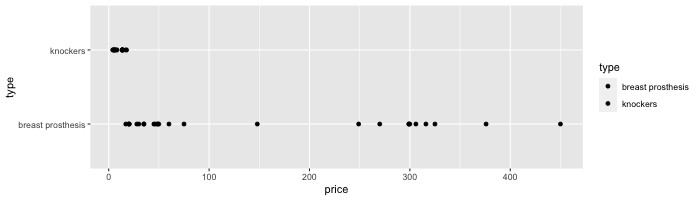

In [160]:
%%R -h 200 -w 700

df <- read_csv('data/comparison.csv')

ggplot(df, aes(x = price, y = type, fill = type)) +
    geom_point()